In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# keras = used for matrix solving

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Sem-2-Data/Churn_Modelling.csv",sep=",")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()

In [ ]:
X[:5, 2]

array(['Female', 'Female', 'Female', 'Female', 'Female'], dtype=object)

In [ ]:
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
X[:5, 2]

array([0, 0, 0, 0, 0], dtype=object)

One-Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
X[:5, 1]

array(['France', 'Spain', 'France', 'France', 'Spain'], dtype=object)

In [ ]:
ct = ColumnTransformer(
    transformers=[(
            "encoder",
            OneHotEncoder(),
            [1] #index number for the Geography column
    )],
    remainder = "passthrough"
)


In [ ]:
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Train-Test-Split

In [ ]:
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Ann

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(units=11,activation='relu'))

In [ ]:
ann.add(Dense(units=6,activation='relu'))

In [ ]:
ann.add(Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs=50)

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 0.5010 - accuracy: 0.7941
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.8027
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8110
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8141
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8163
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8173
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8210
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8230
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8263
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8342

# Image Augmentation

(i)Single image--->20
(ii)generatial adversive neural network

In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

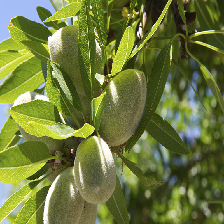

In [ ]:
img = load_img("/content/drive/MyDrive/Sem-2-Data/image (1).png", target_size=(224,224), interpolation="nearest")
img

In [ ]:
img1 = tf.keras.preprocessing.image.img_to_array(img)
img = np.array([img1])

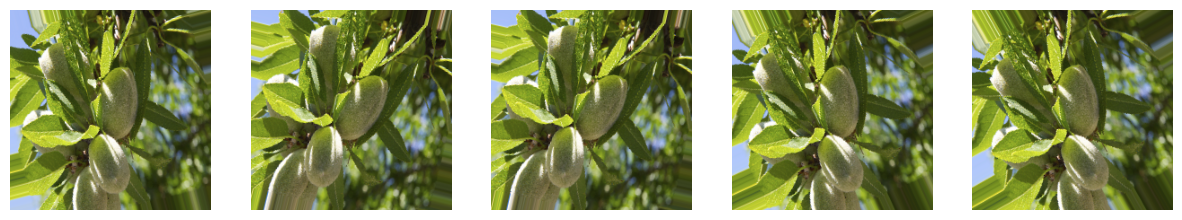

In [ ]:
# Rotation

# ImageDataGenerator rotation
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
for i in range(5):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')

    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

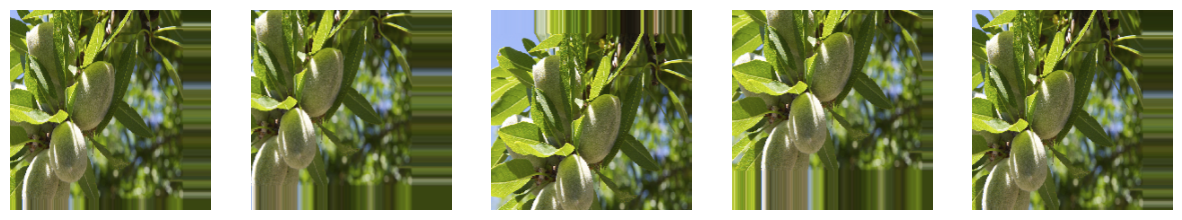

In [ ]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
for i in range(5):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')

    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

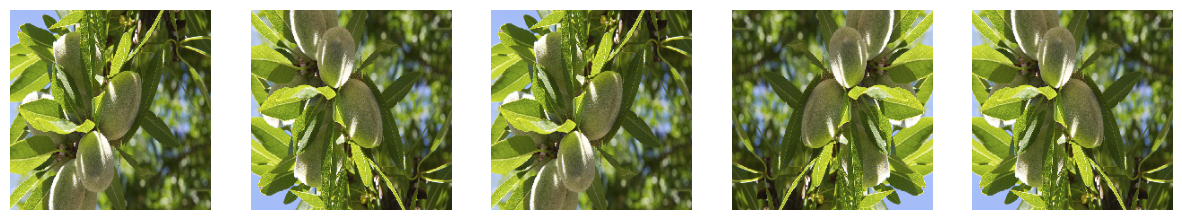

In [ ]:
# ImageDataGenerator flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
for i in range(5):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')

    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

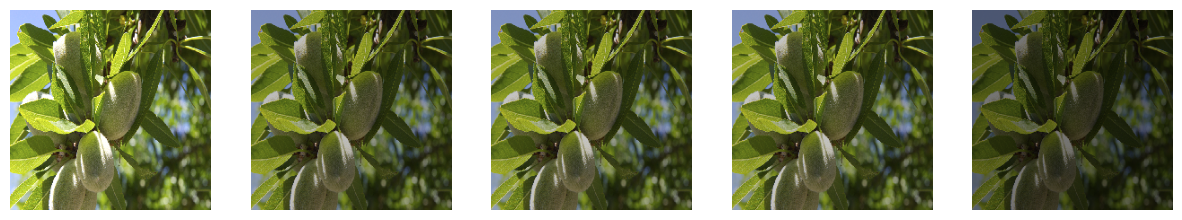

In [ ]:
# ImageDataGenerator brightness
datagen = ImageDataGenerator(brightness_range=[0.4,1.5])

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

# generate batch of images
for i in range(5):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')

    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

In [ ]:
# Gan can be used to reconstruct images , age detection , increasing data set
# Generator and Discriminator Neural networks
# In data Augmentation geometrical augmentation is used while in GAN matrix values can be changed